2.  (35%) Escriba una rutina para utilizar el método de Taylor de tercer orden para sistemas de ecuaciones de primer orden y pongalo a prueba en el PVI
  \begin{matrix}
x_1'=sin(x_1)+cos(tx_2) & x_1(-1)=2.37 \\
 x_2'=t^{-1}sin(tx_1)& x_2(-1)=-3.48  \\
\end{matrix}
  Considere el intervalo $(-1,0)$, teniendo cuidado con la singularidad en $0$.

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
def approximate(method, h, t0, tf, Y0):
    """General approximation function that works with any method."""
    t_values = np.arange(t0, tf + h, h)
    Y_values = [np.array(Y0)]

    for t in t_values[:-1]:
        Y_values.append(method(t, Y_values[-1], h))

    return np.array(t_values), np.array(Y_values)


def plot_results(t_values, Y_values, h, method_name):
    """Generates plots with improved aesthetics."""
    plt.figure(figsize=(10, 6))
    plt.title(method_name, fontsize=14, fontweight="bold")
    plt.xlabel("Time (t)", fontsize=12)
    plt.ylabel("Function values", fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.6)

    plt.plot(t_values, Y_values[:, 0], label=f"x1 (h={h})", marker="o", markersize=3)
    plt.plot(
        t_values,
        Y_values[:, 1],
        label=f"x2 (h={h})",
        linestyle="dashed",
        marker="s",
        markersize=3,
    )

    plt.legend()
    plt.show()

In [13]:
def simulate(method, h_values, t0, tf, Y0):
    """Simulates the numerical method over a range of step sizes."""
    method_name = method.__name__.replace("_", " ").title()
    for h in h_values:
        t_values, Y_values = approximate(method, h, t0, tf, Y0)
        plot_results(t_values, Y_values, h, method_name)


In [14]:
def dY(t, Y):
    x1, x2 = Y
    dx1 = np.sin(x1) + np.cos(t * x2)
    dx2 = (1 / t) * np.sin(t * x1) if t != 0 else 0
    return np.array([dx1, dx2])

In [15]:
def taylor_3(t, Y, h):
    """Third-order Taylor method for solving ODEs."""

    def dY2(t, Y):
        dx1, dx2 = dY(t, Y)
        ddx1 = np.cos(Y[0]) * dx1 - np.sin(t * Y[1]) * (Y[1] + t * dx2)
        ddx2 = (
            (-1 / t**2) * np.sin(t * Y[0])
            + (1 / t) * np.cos(t * Y[0]) * (t * dx1 + Y[0])
            if t != 0
            else 0
        )
        return np.array([ddx1, ddx2])

    def dY3(t, Y):
        dx1, dx2 = dY(t, Y)
        ddx1, ddx2 = dY2(t, Y)
        dddx1 = (
            -np.sin(Y[0]) * dx1**2
            + np.cos(Y[0]) * ddx1
            - np.cos(t * Y[1]) * (2 * t * dx2 + Y[1] + t * ddx2)
        )
        dddx2 = (
            (2 / t**3) * np.sin(t * Y[0])
            - (1 / t**2) * np.cos(t * Y[0]) * Y[0]
            - (2 / t) * np.sin(t * Y[0]) * dx1
            + (1 / t) * np.cos(t * Y[0]) * ddx1
            if t != 0
            else 0
        )
        return np.array([dddx1, dddx2])

    return Y + h * dY(t, Y) + (h**2) / 2 * dY2(t, Y) + (h**3) / 6 * dY3(t, Y)


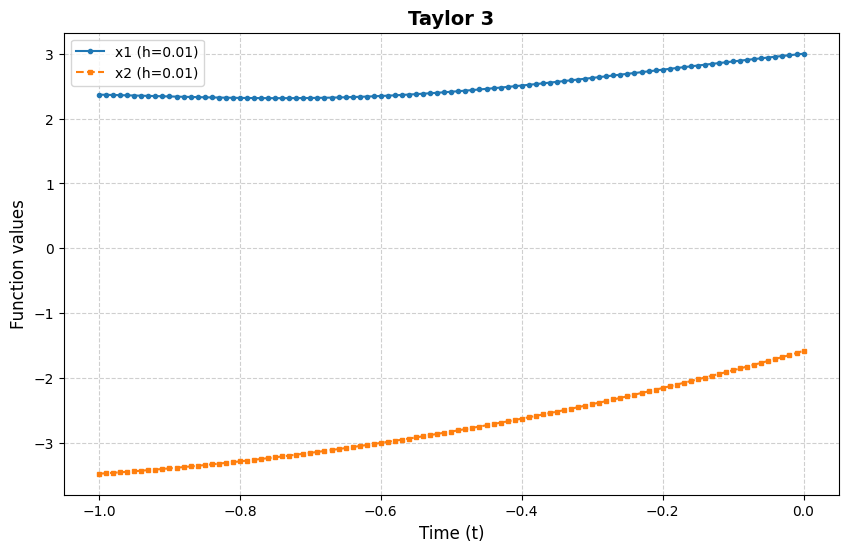

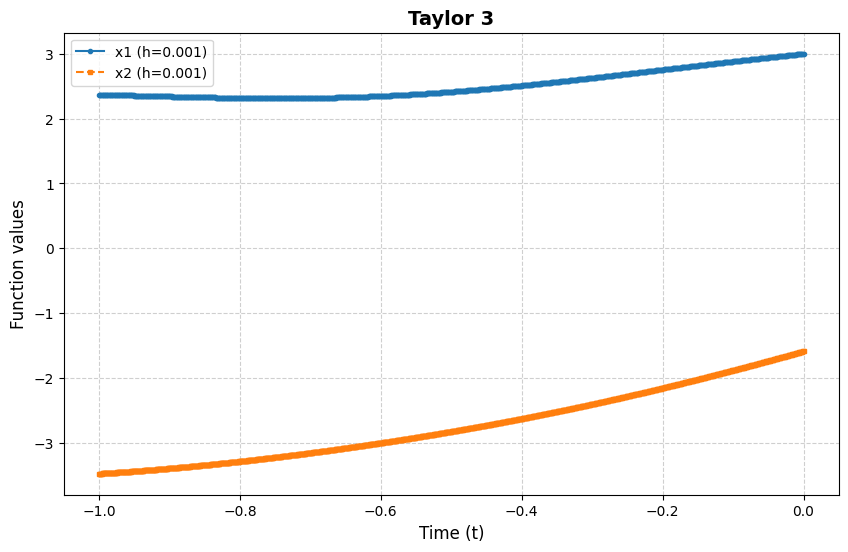

In [16]:
simulate(taylor_3, [0.01, 0.001], t0=-1, tf=0, Y0=[2.37, -3.48])